# **Pistachio Types Detection Dataset**
Predict whether a Pistachio is Kirmizi Pistachio or Siit Pistachio

In [11]:
#Import the drive module from Google Colab to mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Import the pandas library for data manipulation
import pandas as pd

#Read the CSV file from your Google Drive into a pandas DataFrame
dataset = pd.read_csv("/content/drive/MyDrive/pistachio.csv")
print(dataset)

       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0     73107  1161.8070    442.4074    217.7261        0.8705  305.0946   
1     89272  1173.1810    460.2551    251.9546        0.8369  337.1419   
2     60955   999.7890    386.9247    209.1255        0.8414  278.5863   
3     79537  1439.5129    466.7973    221.2136        0.8806  318.2289   
4     96395  1352.6740    515.8730    246.5945        0.8784  350.3340   
...     ...        ...         ...         ...           ...       ...   
1713  65570  2071.4451    418.0258    217.1458        0.8545  288.9400   
1714  68849  1441.2590    451.0457    205.2553        0.8905  296.0764   
1715  90270  1370.5380    428.9636    269.8232        0.7774  339.0211   
1716  73148  1309.8430    469.0491    208.3141        0.8960  305.1801   
1717  78780  1324.8831    451.5905    239.3016        0.8481  316.7109   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0       0.9424        77579  0.771

# **Separating Target Variable and Features**

In [13]:
#Separate the target variable 'Class' and the features
Y = dataset['Class']
X = dataset.drop(['Class'],axis=1)
X

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532


# **Splitting and Normalization of data**

In [14]:
#Import necessary libraries for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#Encode the target variable 'Class' into numerical format
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test= train_test_split(X.values,Y, test_size=0.2, random_state= 42)

#Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **K-Nearest Neighbour Classifier**

K-Nearest Neighbour Classifier Accuracy: 0.8604651162790697
K-Nearest Neighbour Classifier AUC Score: 0.8573913648540514
K-Nearest Neighbour Classifier Precision Score: 0.8275862068965517
K-Nearest Neighbour Classifier Recall Score: 0.8391608391608392
K-Nearest Neighbour Classifier F1 Score: 0.8333333333333334


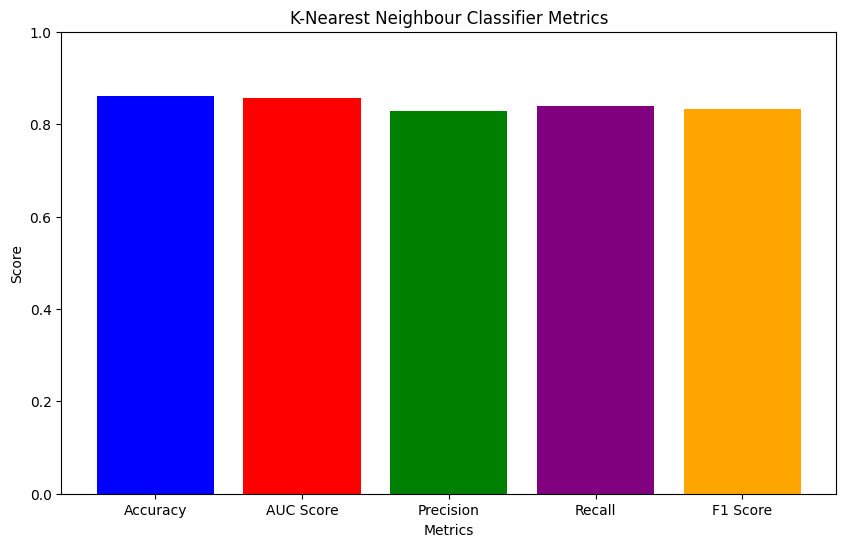

In [15]:
#Import necessary libraries for visualization and model training
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

#Create a KNN classifier with k=5 neighbors
classifier = KNeighborsClassifier(n_neighbors=5)

#Train the KNN classifier on the training data
classifier.fit(X_train_scaled, Y_train)

#Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)

#Calculate the evaluation metrics for the KNN classifier
knn_accuracy = accuracy_score(Y_test, y_pred)
knn_auc_score = roc_auc_score(Y_test, y_pred)
knn_precision = precision_score(Y_test, y_pred)
knn_recall = recall_score(Y_test, y_pred)
knn_f1 = f1_score(Y_test, y_pred)

#Print the evaluation metrics for the KNN classifier
print(f"K-Nearest Neighbour Classifier Accuracy: {knn_accuracy}")
print(f"K-Nearest Neighbour Classifier AUC Score: {knn_auc_score}")
print(f"K-Nearest Neighbour Classifier Precision Score: {knn_precision}")
print(f"K-Nearest Neighbour Classifier Recall Score: {knn_recall}")
print(f"K-Nearest Neighbour Classifier F1 Score: {knn_f1}")

#Create a list of metric names
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score']

#Create a list of corresponding metric values
#accuracy, auc_score, precision, recall, and f1 are already calculated
values = [knn_accuracy,knn_auc_score,knn_precision,knn_recall,knn_f1]

plt.figure(figsize=(10, 6))

#Create a bar plot with the metrics on the x-axis and their corresponding values on the y-axis
#Each bar is colored differently for better visualization
plt.bar(metrics, values, color=['blue', 'red', 'green', 'purple', 'orange'])

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('K-Nearest Neighbour Classifier Metrics')
#Set the y-axis limits between 0 and 1 to better visualize the scores
plt.ylim(0.0, 1.0)
plt.show()

# **Decision tree learning**

Decision Tree Accuracy: 0.8052325581395349
Decision Tree AUC Score: 0.8020561528024215
Decision Tree Precision Score: 0.8064691857258304
Decision Tree Recall Score: 0.8052325581395349
Decision Tree F1 Score: 0.8056793227235112


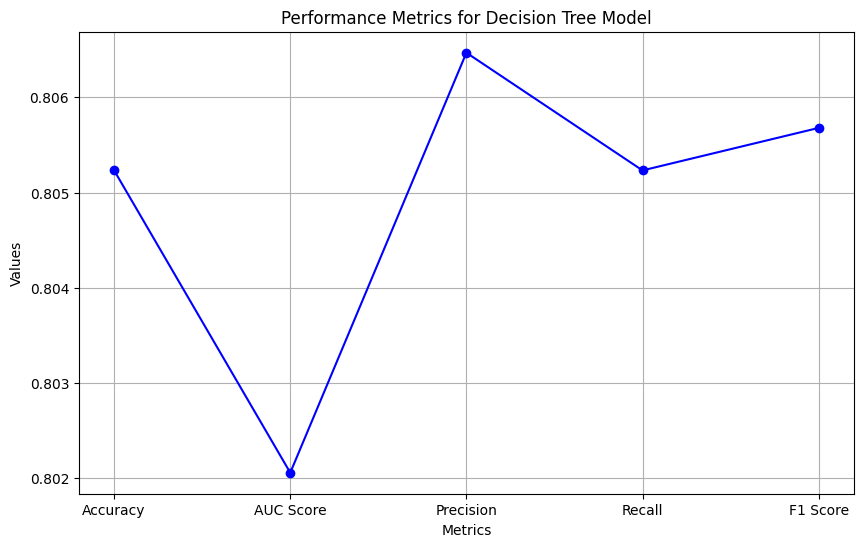

In [16]:
#Import the DecisionTreeClassifier from the sklearn.tree module
from sklearn import tree

#Create a Decision Tree Classifier with entropy as the criterion
Classifier = tree.DecisionTreeClassifier(criterion = 'entropy')

#Train the Decision Tree Classifier on the training data
Classifier = Classifier.fit(X_train_scaled, Y_train)

#Make predictions on the test data
y_pred = Classifier.predict(X_test_scaled)

#Calculate the evaluation metrics for the Decision Tree Classifier
DT_accuracy = accuracy_score(Y_test, y_pred)
DT_auc_score = roc_auc_score(Y_test, y_pred)
DT_precision = precision_score(Y_test, y_pred, average='weighted')
DT_recall = recall_score(Y_test, y_pred, average='weighted')
DT_f1 = f1_score(Y_test, y_pred, average='weighted')

#Print the evaluation metrics for the Decision Tree Classifier
print(f"Decision Tree Accuracy: {DT_accuracy}")
print(f"Decision Tree AUC Score: {DT_auc_score}")
print(f"Decision Tree Precision Score: {DT_precision}")
print(f"Decision Tree Recall Score: {DT_recall}")
print(f"Decision Tree F1 Score: {DT_f1}")

# Create a list of metric names
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score']

# Create a list of corresponding metric values for the Decision Tree Classifier
values = [DT_accuracy, DT_auc_score, DT_precision, DT_recall, DT_f1]

plt.figure(figsize=(10, 6))

# Create a line plot with the metrics on the x-axis and their corresponding values on the y-axis
# Each point is marked with a circle and connected with a line
plt.plot(metrics, values, marker='o', color='b', linestyle='-')
plt.title('Performance Metrics for Decision Tree Model')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.grid(True)
plt.show()


[Text(0.47922137605042014, 0.9736842105263158, 'x[3] <= 0.421\nentropy = 0.981\nsamples = 1374\nvalue = [797, 577]'),
 Text(0.23897058823529413, 0.9210526315789473, 'x[12] <= 0.192\nentropy = 0.488\nsamples = 745\nvalue = [666, 79]'),
 Text(0.14390756302521007, 0.868421052631579, 'x[15] <= 0.979\nentropy = 0.903\nsamples = 188\nvalue = [128, 60]'),
 Text(0.10714285714285714, 0.8157894736842105, 'x[6] <= 0.959\nentropy = 0.644\nsamples = 134\nvalue = [112, 22]'),
 Text(0.09873949579831932, 0.7631578947368421, 'x[10] <= 0.821\nentropy = 0.708\nsamples = 114\nvalue = [92, 22]'),
 Text(0.07142857142857142, 0.7105263157894737, 'x[10] <= 0.542\nentropy = 0.635\nsamples = 106\nvalue = [89, 17]'),
 Text(0.04201680672268908, 0.6578947368421053, 'x[15] <= 0.955\nentropy = 0.959\nsamples = 21\nvalue = [13, 8]'),
 Text(0.03361344537815126, 0.6052631578947368, 'x[11] <= 0.544\nentropy = 0.787\nsamples = 17\nvalue = [13, 4]'),
 Text(0.01680672268907563, 0.5526315789473685, 'x[3] <= 0.393\nentropy = 

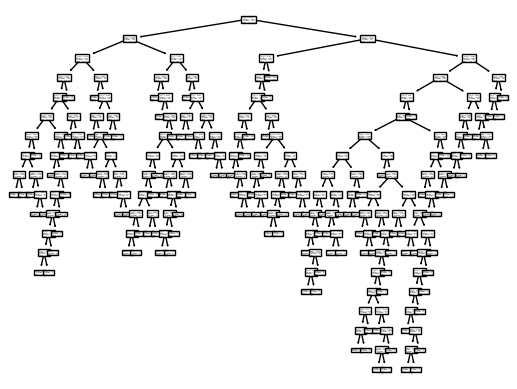

In [17]:
#Plot the Decision Tree using the plot_tree function from the sklearn.tree module
tree.plot_tree(Classifier)

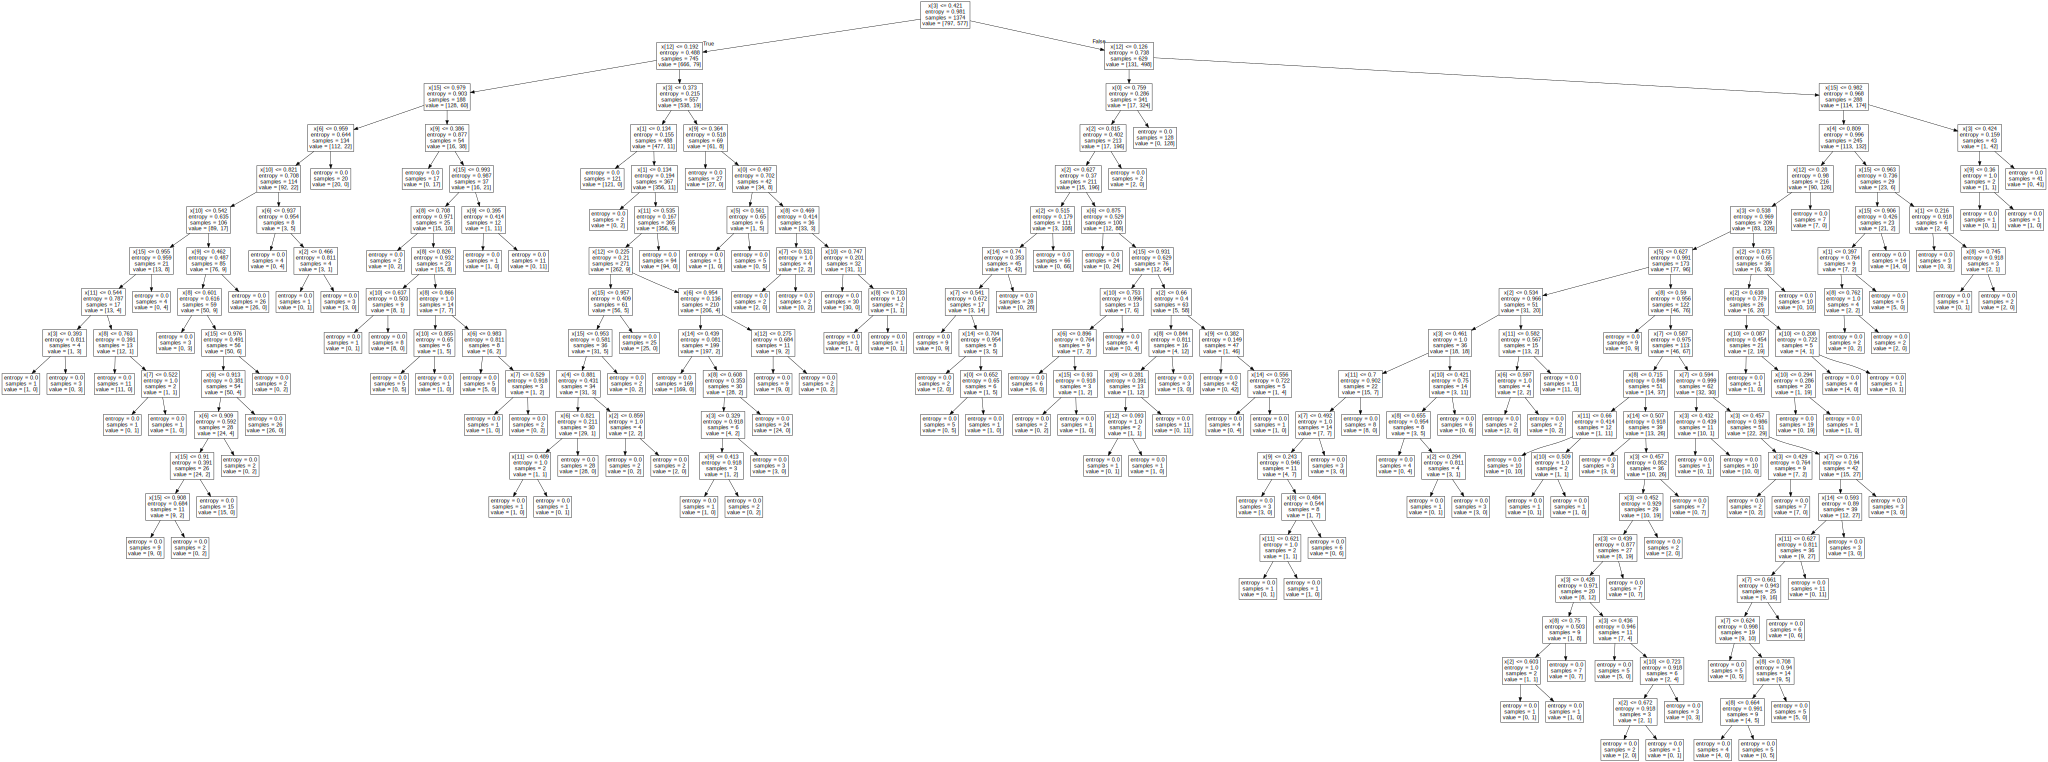

In [18]:
#Import the graphviz library for visualizing the Decision Tree
import graphviz

# Export the Decision Tree in the DOT format using the export_graphviz function
dot_data = tree.export_graphviz(Classifier, out_file=None)

#Create a graphviz Source object from the DOT data
graph = graphviz.Source(dot_data)
graph

# **Neural Network**

Epoch 1/30
35/35 [==============================] - 1s 8ms/step - loss: 0.6604 - accuracy: 0.5914 - val_loss: 0.6379 - val_accuracy: 0.5745
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5855 - accuracy: 0.7298 - val_loss: 0.5388 - val_accuracy: 0.7491
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.8098 - val_loss: 0.4302 - val_accuracy: 0.8291
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8590 - val_loss: 0.3709 - val_accuracy: 0.8473
Epoch 5/30
35/35 [==============================] - 0s 3ms/step - loss: 0.3612 - accuracy: 0.8535 - val_loss: 0.3492 - val_accuracy: 0.8436
Epoch 6/30
35/35 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8462 - val_loss: 0.3472 - val_accuracy: 0.8364
Epoch 7/30
35/35 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8599 - val_loss: 0.3471 - val_accuracy: 0.8327
Epoch 8/30
35/35 [==

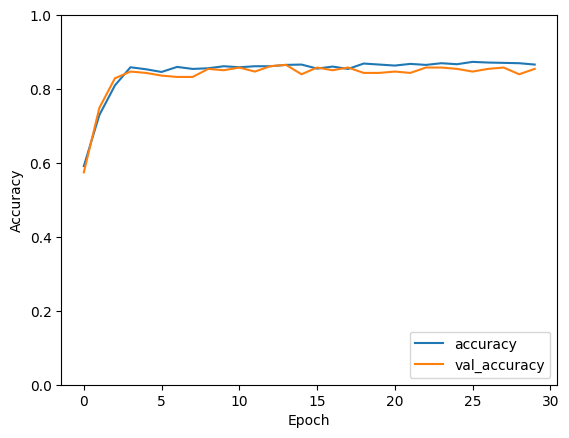

In [19]:
#Import the necessary libraries from TensorFlow and Keras
from tensorflow import keras
from keras import layers,models

#Create a sequential model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), #Input layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'), #Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' activation for binary classification
])

#Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model with training data, validation split, and specified epochs and batch size
md =model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=30, batch_size=32)

#Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

#Make predictions on the test data
y_pred = model.predict(X_test_scaled)

#Convert probabilities to binary predictions (0 or 1)
y_pred_pre = (model.predict(X_test_scaled) > 0.5).astype("int32")

#Print the evaluation metrics for the Neural Network
print(f"Neural Network Accuracy: {accuracy}")
print(f"Neural Network AUC Score: {roc_auc_score(Y_test, y_pred)}")
print(f"Neural Network Precision Score: {precision_score(Y_test, y_pred_pre)}")
print(f"Neural Network Recall Score: {recall_score(Y_test, y_pred_pre)}")
print(f"Neural Network F1 Score: {f1_score(Y_test, y_pred_pre)}")

#Plot the training and validation accuracy over epochs
plt.plot(md.history['accuracy'], label='accuracy')
plt.plot(md.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# **Support vector machine**

Support vector machine Accuracy: 0.877906976744186
Support vector machine AUC Score: 0.8743346206032774
Support vector machine Precision Score: 0.8531468531468531
Support vector machine Recall Score: 0.8531468531468531
Support vector machine F1 Score: 0.8531468531468531


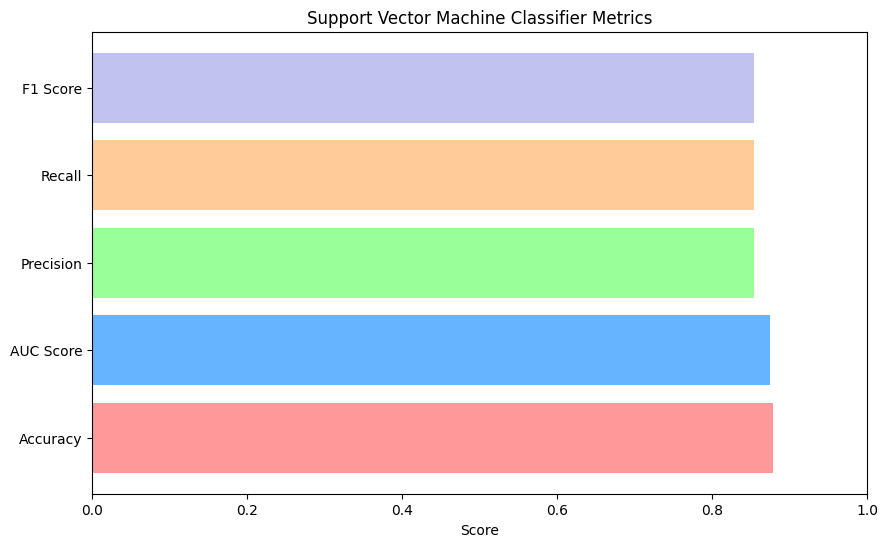

In [20]:
#Import the SVC (Support Vector Classifier) class from sklearn.svm
from sklearn.svm import SVC

#Create an SVC model with a linear kernel, C=1.0
svm_model = SVC(kernel='linear', C=1.0)

#Train the SVC model on the training data
svm_model.fit(X_train_scaled, Y_train)

#Make predictions on the test data
y_pred = svm_model.predict(X_test_scaled)

#Calculate the evaluation metrics for the SVC model
SVC_accuracy = accuracy_score(Y_test, y_pred)
SVC_auc_score = roc_auc_score(Y_test, y_pred)
SVC_precision = precision_score(Y_test, y_pred)
SVC_recall = recall_score(Y_test, y_pred)
SVC_f1 = f1_score(Y_test, y_pred)

#Print the evaluation metrics for the SVC model
print(f"Support vector machine Accuracy: {SVC_accuracy}")
print(f"Support vector machine AUC Score: {SVC_auc_score}")
print(f"Support vector machine Precision Score: {SVC_precision}")
print(f"Support vector machine Recall Score: {SVC_recall}")
print(f"Support vector machine F1 Score: {SVC_f1}")

#Create a list of metric names
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score']

#Create a list of corresponding metric values for the SVC model
values = [SVC_accuracy, SVC_auc_score, SVC_precision, SVC_recall, SVC_f1]

plt.figure(figsize=(10, 6))

# Create a horizontal bar plot with the metrics on the y-axis and their corresponding values on the x-axis
# Each bar is colored differently for better visualization
plt.barh(metrics, values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.xlabel('Score')
plt.title('Support Vector Machine Classifier Metrics')
plt.xlim(0.0, 1.0)  # Set x-axis limits between 0 and 1
plt.show()